## DSC4828 Assignment 5
The purpose of this assignment is to experiment with linear and logistic regression in Python.
Add content to the notebook and submit it as a zip file with any additional datasets.
#### Name: Mynhardt L. Traut
#### Student Number: 54763088

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Part 1
The data used in this notebook is simulated height, weight and gender data downloaded from Kaggle (https://www.kaggle.com/mustafaali96/weight-height).  
Read the data from the csv file 'hwg.csv', and display the first few items:

In [2]:
data = pd.read_csv('hwg.csv')  
data.head()

,Height,Weight,Gender
0,157.3,59.4,0
1,166.1,79.9,1
2,168.0,91.7,1
3,159.7,54.5,0
4,185.2,92.6,1


Draw a scatter plot of weight against height, indicating the gender through the colour of the dots:

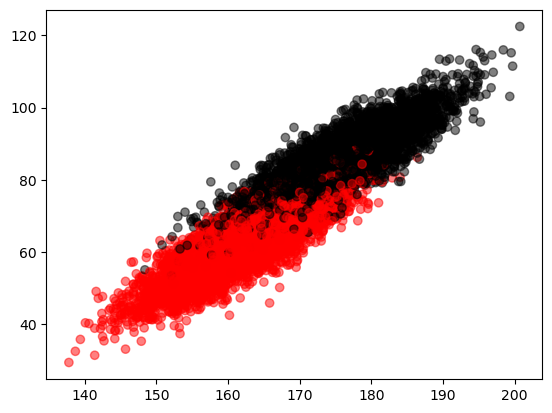

In [3]:
colours = {0:'red', 1:'black'}
plt.scatter(data['Height'], data['Weight'], c = data['Gender'].map(colours), alpha=0.5)
plt.show()

Create separate dataframes for the two genders:

In [4]:
dataF = data.loc[data['Gender'] == 0]
dataM = data.loc[data['Gender'] == 1]

Create numpy arrays for the height and weight data, and perform linear regression using the LinearRegression class from sklearn.  Print the coefficient and intercept value for the fitted line.

In [5]:
H = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
W = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(H, W)  # perform linear regression
W_pred = linear_regressor.predict(H)  # make predictions
print(linear_regressor.coef_[0],linear_regressor.intercept_)

[1.37806778] [-159.07797521]


Do the same for the two separate gender dataframes:

In [6]:
HF = dataF.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
WF = dataF.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressorF = LinearRegression()  # create object for the class
linear_regressorF.fit(HF, WF)  # perform linear regression
WF_pred = linear_regressorF.predict(HF)  # make predictions
print(linear_regressorF.coef_[0],linear_regressorF.intercept_)

[1.0703122] [-111.57293318]


In [7]:
HM = dataM.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
WM = dataM.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressorM = LinearRegression()  # create object for the class
linear_regressorM.fit(HM, WM)  # perform linear regression
WM_pred = linear_regressorM.predict(HM)  # make predictions
print(linear_regressorM.coef_[0],linear_regressorM.intercept_)

[1.06457706] [-101.81834993]


Now plot the fitted linear regression lines on the scatter plot of the data.

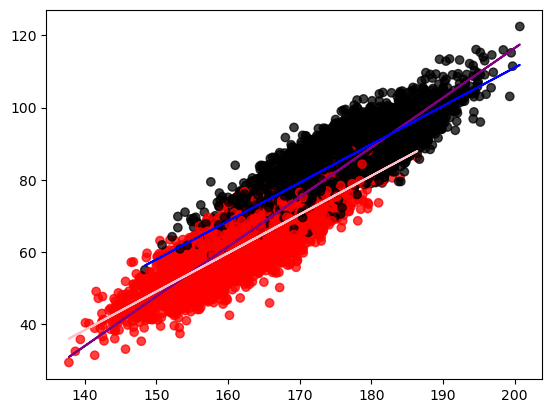

In [8]:
colours = {0:'red', 1:'black'}
plt.scatter(data['Height'], data['Weight'], c = data['Gender'].map(colours), alpha=0.75)
plt.plot(H, W_pred, color='purple')
plt.plot(HF, WF_pred, color='pink')
plt.plot(HM, WM_pred, color='blue')
plt.show()

What does the gradient of the fitted lines represent?
While the gradients of the two regression lines of the subsets are very similar, the gradient of the regression line for the full set is much steeper.  Can you explain why this is so?
What are the implications of this fact for predicting the weight given the height of a person?


<u>Answer:</u>

1. What does the gradient of the fitted lines represent?
The gradient of the lines shows how much weight increases when height increases by one unit. So, for every extra centimeter in height, the gradient tells us how many more kilograms the person is likely to weigh.

2. Why is the gradient of the regression line for the full set much steeper than the gradients of the two gender-specific regression lines?
The gradient for the whole dataset is steeper because it’s trying to fit one line through data that actually has two different trends — one for men and one for women. Men and women typically have different average heights and weights. When you mix these two groups together, the line that best fits all the data ends up being steeper because it has to account for the larger overall differences in height and weight.

3. What are the implications of this fact for predicting the weight given the height of a person?
If you try to predict someone’s weight based on their height using the line that fits all the data together, the prediction might not be as accurate because that line doesn't fully capture the differences between men and women. The steeper line for the combined data could end up predicting a higher weight for shorter people (like women) and a lower weight for taller people (like men), leading to potential errors. It’s generally better to use separate lines for men and women if you know their gender, as this will give a more accurate prediction based on the trends specific to each group.

### Part 2

Now we are going to use the same data set for a simple demonstration of logistic regression:

The features will be only 'Height' and 'Weight', and the target is 'Gender'.  In other words, we are going to try to classify a person as either male or female based on height and weight only.

In [9]:
feature_cols = ['Height', 'Weight']
X = data[feature_cols] 
y = data.Gender

In [10]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [11]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [12]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1159,   82],
       [ 106, 1153]], dtype=int64)

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9248
Precision: 0.9336032388663967
Recall: 0.9158061953931692


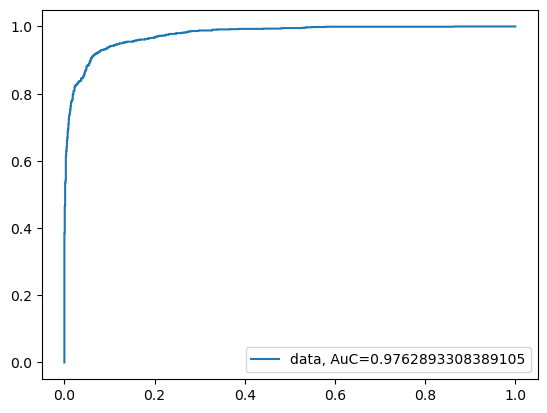

In [14]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, AuC="+str(auc))
plt.legend(loc=4)
plt.show()

It is also possible to calculate the performance metrics from the confusion matrix.  (Revision of Unit 4.)

In [15]:
def err_metric(CM): 
     
    TN = CM[0,0]
    FN = CM[1,0]
    TP = CM[1,1]
    FP = CM[0,1]
    precision =(TP)/(TP+FP)
    accuracy_model  =(TP+TN)/(TP+TN+FP+FN)
    recall_score  =(TP)/(TP+FN)
    specificity_value =(TN)/(TN + FP)
     
    False_positive_rate =(FP)/(FP+TN)
    False_negative_rate =(FN)/(FN+TP)
 
    F1_score =2*(( precision * recall_score)/( precision + recall_score))
 
    print("Precision: ",precision)
    print("Accuracy: ",accuracy_model)
    print("Recall: ",recall_score)
    print("Specificity: ",specificity_value)
    print("False Positive rate: ",False_positive_rate)
    print("False Negative rate: ",False_negative_rate)
    print("F1 score: ",F1_score)

In [16]:
err_metric(cnf_matrix)

Precision:  0.9336032388663967
Accuracy:  0.9248
Recall:  0.9158061953931692
Specificity:  0.9339242546333602
False Positive rate:  0.06607574536663981
False Negative rate:  0.08419380460683082
F1 score:  0.9246190858059343


Now repeat the exercise, but use only one feature at a time (either 'Height' or 'Weight').  
What do you expect will happen to the performance of the model?  
Does your experiment confirm your suspicion?


Confusion Matrix for 'Height':
 [[1027  214]
 [ 248 1011]]
Accuracy: 0.8152
Precision: 0.8253061224489796
Recall: 0.8030182684670373


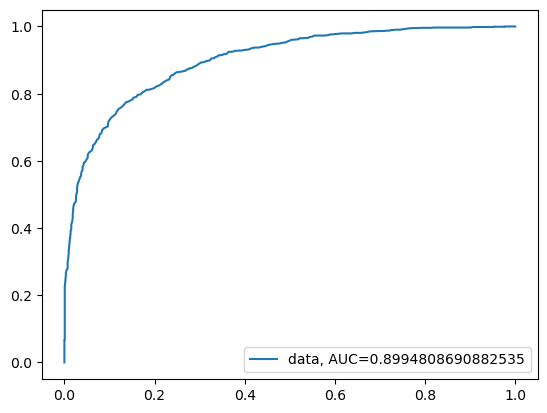

In [17]:
# Using only 'Height'
X_height = data[['Height']]
y = data.Gender

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_height, y, test_size=0.25, random_state=0)

# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix for 'Height':\n", cnf_matrix)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

# ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

Confusion Matrix for 'Weight':
 [[1132  109]
 [ 123 1136]]
Accuracy: 0.9072
Precision: 0.9124497991967871
Recall: 0.9023034154090548


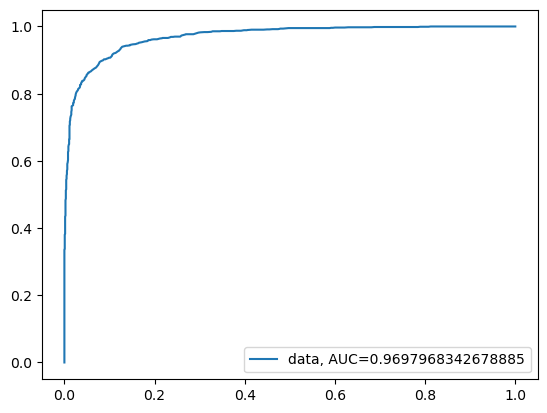

In [18]:
# Using only 'Weight'
X_weight = data[['Weight']]
y = data.Gender

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_weight, y, test_size=0.25, random_state=0)

# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix for 'Weight':\n", cnf_matrix)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

# ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### Part 3 ###
Now repeat the exercise with real data:  use the file hwg_Howell.csv with data that was compiled by Nancy Howell in the 1960 and contains data from the San people. (It was downloaded from https://github.com/rmcelreath/rethinking/tree/master/, and the format changed to make it directly usable in this notebook.)
Note that the shape of the scatter diagrams differ from the simulated data.  This is because children were included in this data set.  Filter out all instances where individuals weigh less than 25kg or are shorter than 135cm, as these will most probably be children.  
How do the results of a real dataset compare to the results from the simulated dataset?

Confusion Matrix (Real Data):
 [[50  5]
 [ 6 35]]
Accuracy: 0.8854166666666666
Precision: 0.875
Recall: 0.8536585365853658


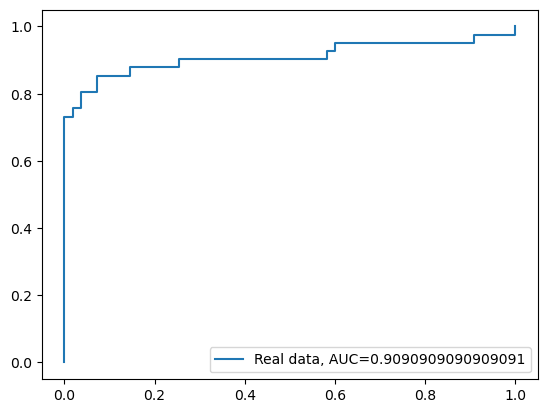

In [19]:
# Step 1: Load the real dataset
data_real = pd.read_csv('hwg_Howell.csv')

# Step 2: Filter out children
data_filtered = data_real[(data_real['Weight'] >= 25) & (data_real['Height'] >= 135)]

# Step 3: Prepare the data for the model
feature_cols = ['Height', 'Weight']
X_real = data_filtered[feature_cols]
y_real = data_filtered['Gender']

# Split the data into training and testing sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.25, random_state=0)

# Step 4: Train the logistic regression model
logreg_real = LogisticRegression()
logreg_real.fit(X_train_real, y_train_real)

# Predict the labels for the test set
y_pred_real = logreg_real.predict(X_test_real)

# Step 5: Evaluate the model's performance
cnf_matrix_real = metrics.confusion_matrix(y_test_real, y_pred_real)
print("Confusion Matrix (Real Data):\n", cnf_matrix_real)

print("Accuracy:", metrics.accuracy_score(y_test_real, y_pred_real))
print("Precision:", metrics.precision_score(y_test_real, y_pred_real))
print("Recall:", metrics.recall_score(y_test_real, y_pred_real))

# ROC Curve
y_pred_proba_real = logreg_real.predict_proba(X_test_real)[:, 1]
fpr_real, tpr_real, _ = metrics.roc_curve(y_test_real, y_pred_proba_real)
auc_real = metrics.roc_auc_score(y_test_real, y_pred_proba_real)
plt.plot(fpr_real, tpr_real, label="Real data, AUC="+str(auc_real))
plt.legend(loc=4)
plt.show()

* How do the results of a real dataset compare to the results from the simulated dataset?

The results from the real dataset show that the model still does a good job of predicting gender based on height and weight, but the predictions aren't quite as accurate as they were with the simulated data. The curve in the graph looks a bit blocky because the real data has some irregularities and fewer data points, especially after filtering out the children. Even though the model is still fairly reliable, it's a little less smooth and confident than when it worked with the simulated, more evenly distributed data.